Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('insurance.csv')

In [2]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

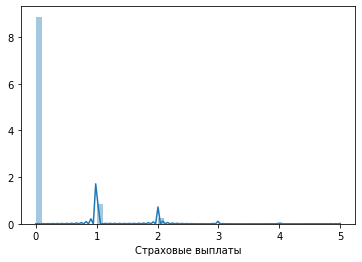

In [5]:
df['Зарплата'] = df['Зарплата'].astype('int')
df['Возраст'] = df['Возраст'].astype('int')
sns.distplot(df['Страховые выплаты'])

Количество страховых выплат очень мало, это отлично.

## 2. Алгоритм преобразования

**Алгоритм**

Я умножу имеющиеся признаки на квадратную невырожденную матрицу и сравню качество линейной регресии на двух матрицах: умноженной на квадратную неврожденную матрицу и не умноженой на неё.

## 3. Проверка алгоритма

In [6]:
matrix1 = df.drop('Страховые выплаты', axis=1).values
matrix2 =np.random.normal(size = (4,4)) 
target = df['Страховые выплаты'].values
matrix2

array([[-0.18798051, -0.4932051 , -1.5378752 , -2.34480863],
       [-1.09160073, -0.33524866, -0.14957595,  1.51480065],
       [-0.02911364,  2.24797712,  0.76308865,  0.93209725],
       [-0.42730805, -0.54739343,  0.45546598, -0.17345166]])

Проверяем, что матрица обратима:

In [7]:
np.linalg.inv(matrix2)

array([[-0.4012109 , -0.49060268, -0.37663845, -0.88477766],
       [ 0.19185103,  0.00142984,  0.45810839, -0.11926356],
       [-0.2491375 , -0.35501837,  0.13764063,  1.00715185],
       [-0.27126294,  0.27187399, -0.15643699, -0.56453712]])

In [8]:
model = LinearRegression()
model.fit(matrix1, target)
predictions = model.predict(matrix1)
print('Качество линейной регрессии на исходных признаках:',r2_score(target, predictions))

matrix3 = matrix1 @ matrix2
model.fit(matrix3, target)
predictions = model.predict(matrix3)
print('Качество линейной регрессии на преобразованных признаках:',r2_score(target, predictions))

Качество линейной регрессии на исходных признаках: 0.42494550308169177
Качество линейной регрессии на преобразованных признаках: 0.42494550308168855


Качество линейной регрессии не изменилось - алгоритм преобразования данных работает корректно.